# Loan Dataset Exploration 
## by Marwan Mohamed Mohamed Zidan

## Preliminary Wrangling

> this document investigates a Loan dataset with over 100 thousand loan record with their variant attributes

In [393]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [394]:
loan_dataset = pd.read_csv('prosperLoanData.csv')
loan_dataset.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [395]:
loan_dataset=loan_dataset[['ListingKey','LoanOriginalAmount',
                         'BorrowerRate','LoanStatus','IncomeRange',
                         'EmploymentStatus','MonthlyLoanPayment','Term','ListingCreationDate'
                        ,'IsBorrowerHomeowner','IncomeVerifiable','Investors'
                        ]]

loan_dataset.head()

,ListingKey,LoanOriginalAmount,BorrowerRate,LoanStatus,IncomeRange,EmploymentStatus,MonthlyLoanPayment,Term,ListingCreationDate,IsBorrowerHomeowner,IncomeVerifiable,Investors
0,1021339766868145413AB3B,9425,0.1580,Completed,"$25,000-49,999",Self-employed,330.43,36,2007-08-26 19:09:29.263000000,True,True,258
1,10273602499503308B223C1,10000,0.0920,Current,"$50,000-74,999",Employed,318.93,36,2014-02-27 08:28:07.900000000,False,True,1
2,0EE9337825851032864889A,3001,0.2750,Completed,Not displayed,Not available,123.32,36,2007-01-05 15:00:47.090000000,False,True,41
3,0EF5356002482715299901A,10000,0.0974,Current,"$25,000-49,999",Employed,321.45,36,2012-10-22 11:02:35.010000000,True,True,158
4,0F023589499656230C5E3E2,15000,0.2085,Current,"$100,000+",Employed,563.97,36,2013-09-14 18:38:39.097000000,True,True,20


In [396]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ListingKey           113937 non-null  object 
 1   LoanOriginalAmount   113937 non-null  int64  
 2   BorrowerRate         113937 non-null  float64
 3   LoanStatus           113937 non-null  object 
 4   IncomeRange          113937 non-null  object 
 5   EmploymentStatus     111682 non-null  object 
 6   MonthlyLoanPayment   113937 non-null  float64
 7   Term                 113937 non-null  int64  
 8   ListingCreationDate  113937 non-null  object 
 9   IsBorrowerHomeowner  113937 non-null  bool   
 10  IncomeVerifiable     113937 non-null  bool   
 11  Investors            113937 non-null  int64  
dtypes: bool(2), float64(2), int64(3), object(5)
memory usage: 8.9+ MB


In [397]:
loan_dataset.shape

(113937, 12)

Check if there are any duplicates in the dataset

In [398]:
loan_dataset.duplicated().sum()

871

There are 871 duplicates in our dataset so we will drop these rows

In [399]:
loan_dataset=loan_dataset.drop_duplicates();

In [400]:
loan_dataset.shape

(113066, 12)

Check if there are any null values

In [401]:
loan_dataset.isna().sum()

ListingKey                0
LoanOriginalAmount        0
BorrowerRate              0
LoanStatus                0
IncomeRange               0
EmploymentStatus       2255
MonthlyLoanPayment        0
Term                      0
ListingCreationDate       0
IsBorrowerHomeowner       0
IncomeVerifiable          0
Investors                 0
dtype: int64

As we see the employment status and borrower state is the only column with null values and since it is categorial we will drop those null rows

In [402]:
loan_dataset=loan_dataset.dropna()

In [403]:
loan_dataset.shape

(110811, 12)

### What is the structure of your dataset?
The data set consists of 110811 loan listings and 12 columns that has information related to the loan record , Some of these columns are quantative such as (LoanOriginalAmount,BorrowerRate,MonthlyLoanPayment,Term,Investors) and some of them are categorial such as (LoanStatus,EmploymentStatus,IncomeRange,IsBorrowerHomeowner,IncomeVerifiable)

### What is/are the main feature(s) of interest in your dataset?

the main features are the loan status , borrower rate and loan amount , we aim to see the relation between the other features and how they affect our main features

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

the Income range and employment status and MonthlyLoanPayment will help us know more about the loan status , monthly payment and term will  and IsBorrowerHomeowner will also help in investigating the loan status and also the borrower rate , monthly payment and investors will tell us what makes the loan amount change



## at first we will set up our constant functions and variables to be used throughout the project

In [404]:
#base color (blue color)
base_color = sb.color_palette()[0]


In [405]:
def setBins( minVal, maxVal, step):
    return np.arange(minVal,maxVal+step,step)

## Univariate Exploration

> we will start by investigating our main features.

the first feature will be the loan status

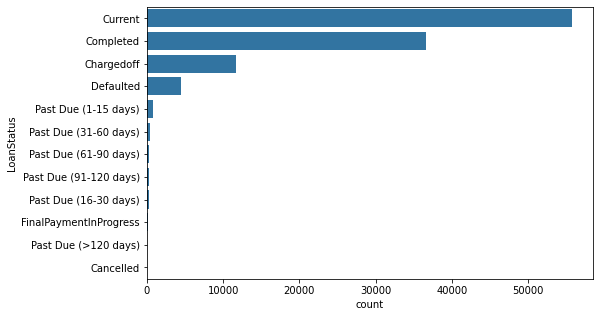

In [406]:
# we order the loan status according to their count then we plot them on a bar chart 
loanStatusOrder=loan_dataset['LoanStatus'].value_counts().index
plt.figure(figsize=[8, 5])
sb.countplot(y=loan_dataset['LoanStatus'],color=base_color,order=loanStatusOrder);


most of the loans are still going(current) , completed , charged off or defaulted , the remaining status are less likely 

the second feature will be borrower rate


In [407]:
#first we will look at the minmum and max values in order to set the bins
loan_dataset['BorrowerRate'].describe()

count    110811.000000
mean          0.193096
std           0.074978
min           0.000000
25%           0.134400
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

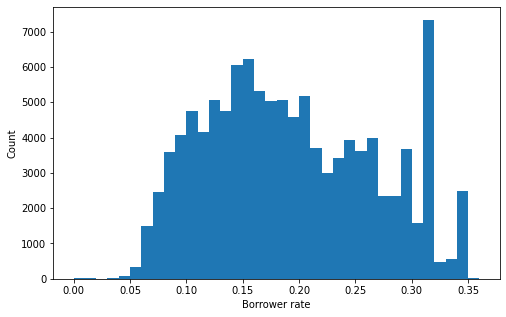

In [408]:
bins = setBins(0,0.36,0.01)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='BorrowerRate',bins=bins);
plt.xlabel('Borrower rate')
plt.ylabel('Count');

the graph seems to be normally distributed with peak at 0.15 and a sudden increase in 0.32

In [409]:
#first we will look at the minmum and max values in order to set the bins
loan_dataset['LoanOriginalAmount'].describe()

count    110811.000000
mean       8391.113292
std        6248.824549
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       35000.000000
Name: LoanOriginalAmount, dtype: float64

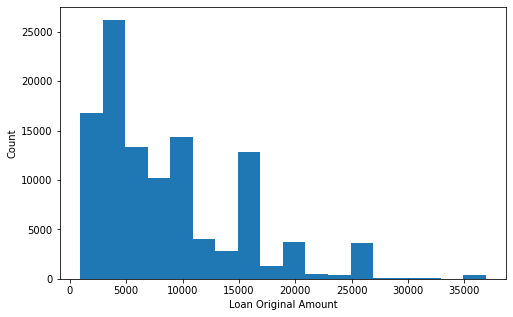

In [410]:
bins = setBins(900,35000,2000)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='LoanOriginalAmount',bins=bins);
plt.xlabel('Loan Original Amount');
plt.ylabel('Count');

we notice that the graph is right skewed so we will perform log transformation and apply smaller bin sizes to intperet the values more clearly

In [411]:
np.log10(loan_dataset['LoanOriginalAmount'].describe())

count    5.044583
mean     3.923820
std      3.795798
min      3.000000
25%      3.602060
50%      3.812913
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

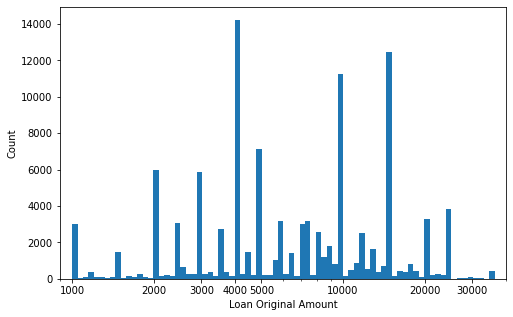

In [412]:
bins = 10**setBins(3,4.6,0.02)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='LoanOriginalAmount',bins=bins);
ticks=[1000,2000,3000,4000,5000,10000,20000,30000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks,labels)
plt.xlim((900,40000))
plt.xlabel('Loan Original Amount');
plt.ylabel('Count');

the peak is around 4000 but we also notice that the counts go up alot on certain values which may be standard values for loans that most people take which are 2k , 3k ,4k ,5k, 10k, 15k, 20k

> After investigating our main features we will take a look into other important features that we want to study.

#### now we will look at the income range

In [413]:
loan_dataset['IncomeRange'].value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
$1-24,999          7241
Not displayed      5486
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

after taking a look at the income range values we notice that it is an ordinal categorical column so we need to order the values of income range from low to hight before plotting

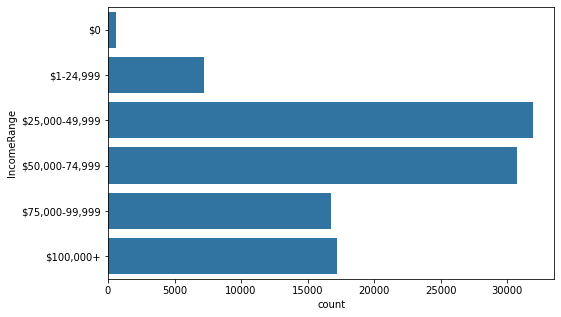

In [414]:
income_range_order =['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+']
plt.figure(figsize=[8, 5])
sb.countplot(y=loan_dataset['IncomeRange'],color=base_color,order=income_range_order);


we can see that the most borrowers have high income range either between 25k-50k or 50k-75k

#### now we will look at the creation date of the loan

In [415]:
loan_dataset['ListingCreationDate'] = pd.to_datetime(loan_dataset['ListingCreationDate'])

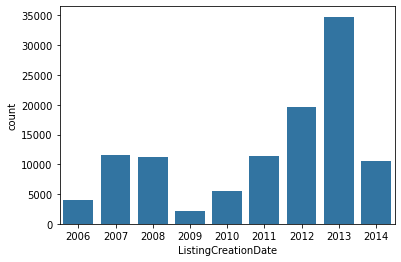

In [416]:
sb.countplot(x=loan_dataset['ListingCreationDate'].dt.year,color=base_color);

we can see that the maximum number of loan is at 2013 while there is a decrease from 2008 to 2009

#### now we will look at the investors column

In [417]:
loan_dataset['Investors'].describe()

count    110811.000000
mean         81.571162
std         104.051689
min           1.000000
25%           2.000000
50%          45.000000
75%         117.000000
max        1189.000000
Name: Investors, dtype: float64

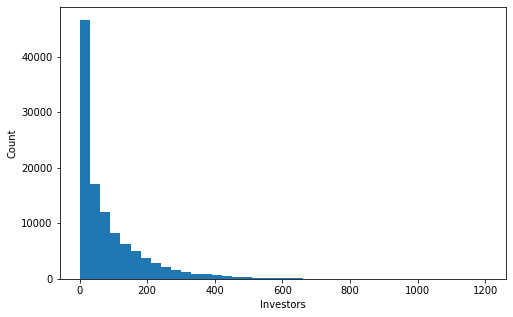

In [418]:
investors_bins = setBins(1,1200,30)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='Investors',bins=investors_bins);
plt.xlabel('Investors');
plt.ylabel('Count');

as the graph is long tailed we will use log transform to interpert it more clearly

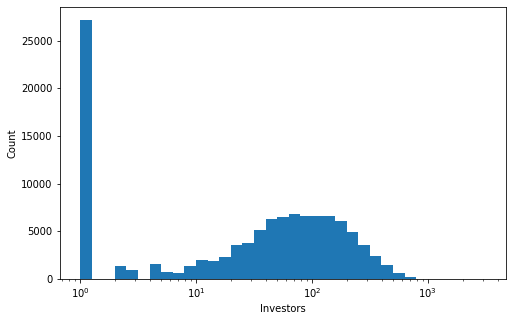

In [419]:
investors_bins =10** setBins(0,3.5,0.1)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='Investors',bins=investors_bins);
plt.xscale('log')
plt.xlabel('Investors');
plt.ylabel('Count');

we can notice that most loans have 1 investor , and a part of that the graph is normally distributed with 100 investor at center

#### now we will look at the employment status of the borrower

In [420]:
loan_dataset['EmploymentStatus'].value_counts()

Employed         66598
Full-time        26354
Self-employed     6052
Not available     5347
Other             3742
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

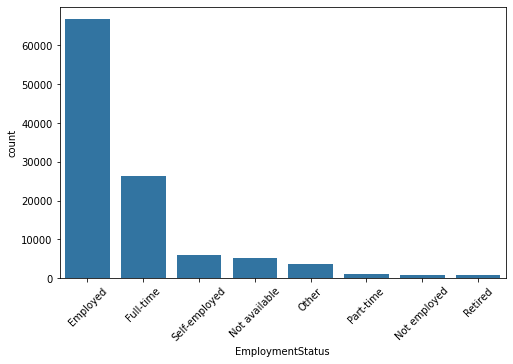

In [421]:
employment_status_order = loan_dataset['EmploymentStatus'].value_counts().index
plt.figure(figsize=[8, 5])
sb.countplot(x=loan_dataset['EmploymentStatus'],color=base_color,order=employment_status_order);
plt.xticks(rotation=45);

most portion of the borrowers are employed at the time they took a loan

#### now we will look at the MonthlyLoanPayment

In [422]:
loan_dataset['MonthlyLoanPayment'].describe()

count    110811.000000
mean        274.236988
std         192.719850
min           0.000000
25%         134.020000
50%         220.730000
75%         372.710000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

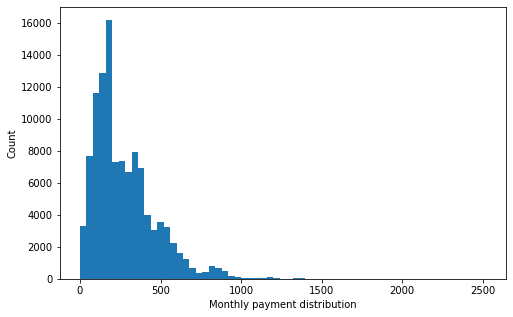

In [423]:
monthly_payment_bins = setBins(0,2500,40)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='MonthlyLoanPayment',bins=monthly_payment_bins);
plt.xlabel('Monthly payment distribution')
plt.ylabel('Count');

the monthly payment graph appears to be right scewed with a long tail so we will make a log transformation scale to observe it better

In [424]:
np.log10(loan_dataset['MonthlyLoanPayment'].describe())

C:\Users\zmmar\AppData\Roaming\Python\Python38\site-packages\pandas\core\arraylike.py:274: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.044583
mean     2.438126
std      2.284926
min          -inf
25%      2.127170
50%      2.343861
75%      2.571371
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

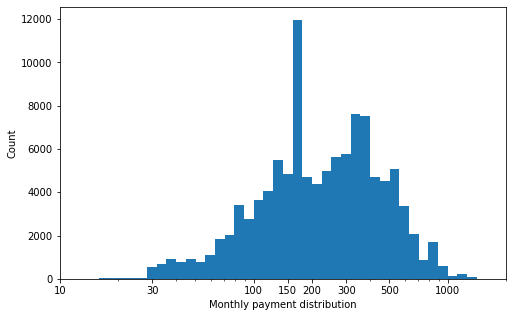

In [425]:
monthly_payment_bins =10** setBins(0,3.5,0.05)
plt.figure(figsize=[8, 5])
plt.hist(data=loan_dataset,x='MonthlyLoanPayment',bins=monthly_payment_bins);
plt.xscale('log')
ticks=[10, 30, 100,150,200,300,500,1000]
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks,labels);
plt.xlim((10,2000))
plt.xlabel('Monthly payment distribution')
plt.ylabel('Count');


this graph appears to be normally distributed with a peak around 170 and an increase around 400

#### Now we will look at the Income Verifiable Column

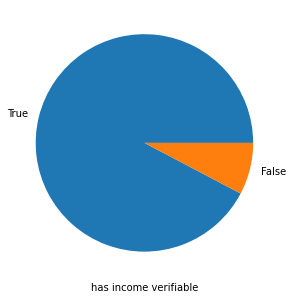

In [426]:
plt.figure(figsize=[8, 5])
plt.pie(x=loan_dataset['IncomeVerifiable'].value_counts(),labels=loan_dataset['IncomeVerifiable'].value_counts().index);
plt.xlabel('has income verifiable');

most borrowers has income verifiable when they took their loan 

#### now we will look at the term column

In [427]:
loan_dataset['Term'].value_counts()

36    84969
60    24228
12     1614
Name: Term, dtype: int64

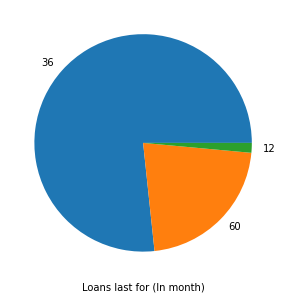

In [428]:
plt.figure(figsize=[8, 5])
plt.pie(x=loan_dataset['Term'].value_counts(),labels=loan_dataset['Term'].value_counts().index);
plt.xlabel('Loans last for (In month)');

most loans last for 36 month

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Borrower rate was normaly distruibuted and it had an unusual point at 0.32 which was larger than the peak in the middle but it didn't need any transformations 

>loan original amount was right skewed so we did a log transform to have better understanding of the feature

>loan status is a nominal feature 



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the monthly loan payment and investors were right skewed long tailed so we did a log transform on them

## Bivariate Exploration


at first we will plot all the quantitative features with each other in order to find the coolreation between all of them , specially between the main features and the other features

In [429]:

numeric_vars =['LoanOriginalAmount','BorrowerRate','MonthlyLoanPayment','Term','Investors']


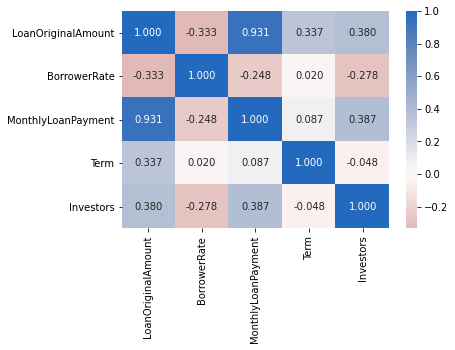

In [430]:
sb.heatmap(loan_dataset[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.xticks(rotation=90);

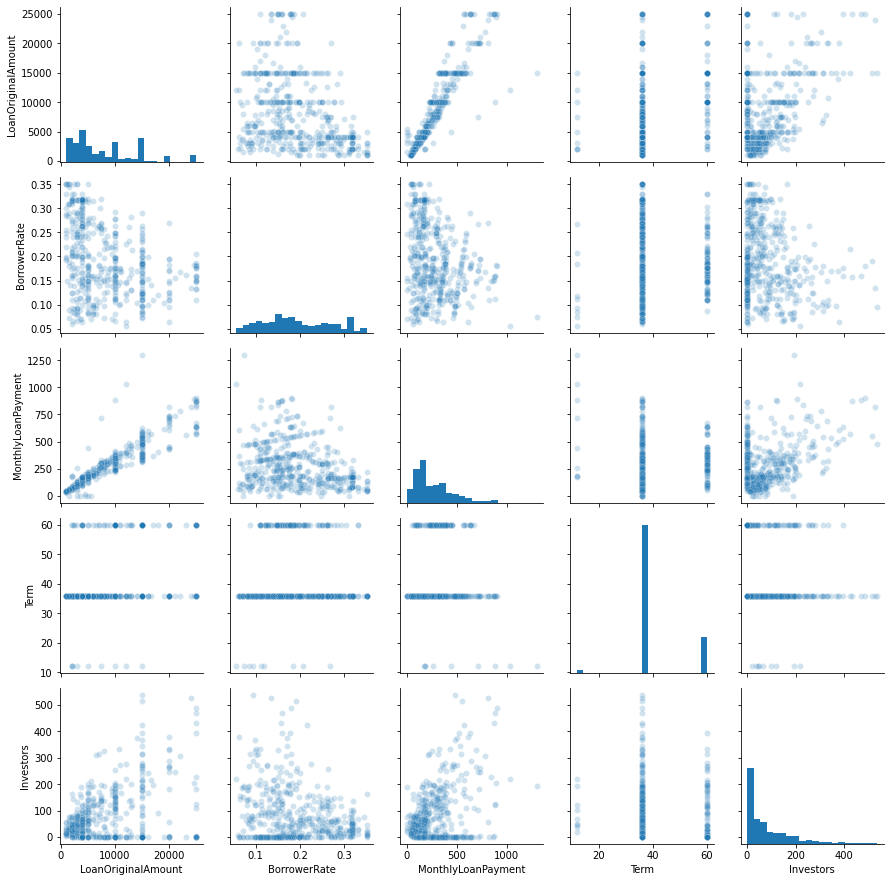

In [431]:
# plot matrix: sample 500 observation so that plots are clearer and
# they render faster
samples = np.random.choice(loan_dataset.shape[0], 500, replace = False)
loan_dataset_samp = loan_dataset.loc[loan_dataset.index.intersection(samples),:]


g = sb.PairGrid(data = loan_dataset_samp, vars = numeric_vars,)
g = g.map_diag(plt.hist, bins = 20,);
g.map_offdiag(sb.scatterplot,alpha = 0.2,x_jitter=0.3);

>loan original amount has postive cooleration with monthly payment , term and inverstors

>borrwer rate has negative cooleration with monthly payment, inverstors , but it has postive cooleration with term

>loan original amount and borrower rate has negative cooleration


After observing relations between only numeric varaiables lets focus more on categorical variables , also their relation with the numeric ones

#### we will plot the relation between Income range and loan status

we have 2 types of loan : a normal loan and a failure loan , so lets separate the 2 first

In [432]:
loan_dataset['LoanStatus'].value_counts()

Current                   55730
Completed                 36622
Chargedoff                11701
Defaulted                  4496
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     2
Name: LoanStatus, dtype: int64

In [433]:
#first we create a list that contains the good loan values
normal_loans = ["Completed", "Current", "FinalPaymentInProgress"]

In [434]:
#second we define a function that checks on the loan type and decides wether its a bad loan or a good loan
def get_loan_type(loan_status):
    if loan_status in normal_loans:
        return 'NormalLoan'
    else:
        return 'FailedLoan'

In [435]:
   
loan_dataset['loan_type'] = loan_dataset['LoanStatus'].apply(get_loan_type)

In [436]:
loan_dataset['loan_type'].value_counts()

NormalLoan    92555
FailedLoan    18256
Name: loan_type, dtype: int64

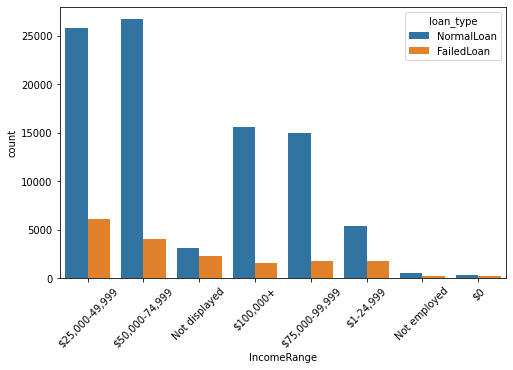

In [437]:
plt.figure(figsize=[8, 5])

sb.countplot(data = loan_dataset, x = 'IncomeRange', hue = 'loan_type')
plt.xticks(rotation='45');

we can see from this plot that the lower the income the more likely the loan will not be completed and fail

#### we will plot the relation between borrower rate and loan status

<AxesSubplot:xlabel='loan_type', ylabel='BorrowerRate'>

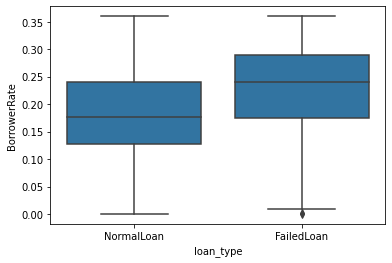

In [438]:
sb.boxplot(data=loan_dataset,x='loan_type',y='BorrowerRate',color=base_color)

from this boxplot we can see that bad loans have higher borrower rates than normal loans

#### we will plot the relation between borrower rate and wether the borrower is a home owner or not

<AxesSubplot:xlabel='IsBorrowerHomeowner', ylabel='BorrowerRate'>

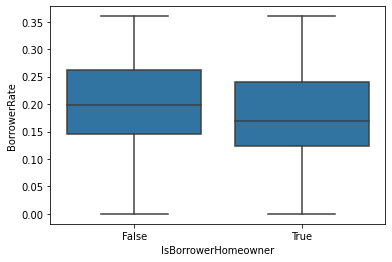

In [439]:
sb.boxplot(data=loan_dataset,x='IsBorrowerHomeowner',y='BorrowerRate',color=base_color)

we notice that the borrower with no home has more borrower rate 

#### we will plot the relation between borrower rate and wether the borrower is a home owner or not

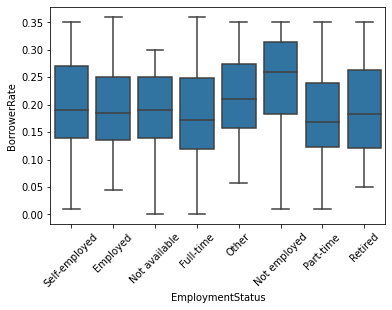

In [440]:
sb.boxplot(data=loan_dataset,x='EmploymentStatus',y='BorrowerRate',color=base_color)
plt.xticks(rotation='45');


in this graph we can conclude that employmed people have borrower lower rate than not employed

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1- regarding the Loan amount we noticed that the more investors there are the more the loan amount is , also the larger the monthly payment of the borrower the loan amount increases , there is a negative relationship between loan amount and borrower rate

2-regarding the loan status we noticed that the less the income of the borrower the more likely that the loan will fail 

3-regarding the borrower rate we noticed that when the term(duration of loan payment) increases the borrower rate increase, but when the number of investors increase the borrwer rate decreases , employed people has lower borrower rate than un employed people

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

-when the term (duration of loan payment) increases the monthly payment increases

-the more investors there are in a loan the lesser is the term(duration of loan payment)

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

#### we will plot the relation between borrower rate and loan amount with respect to loan status wether the loan is normal or bad

In [441]:
loan_type_markers = [['NormalLoan', 'o'],
               ['FailedLoan', 'x']]

In [442]:
samples = np.random.choice(loan_dataset.shape[0], 1000, replace = False)
loan_dataset_samp = loan_dataset.loc[loan_dataset.index.intersection(samples),:]

Text(0, 0.5, 'borrower rate')

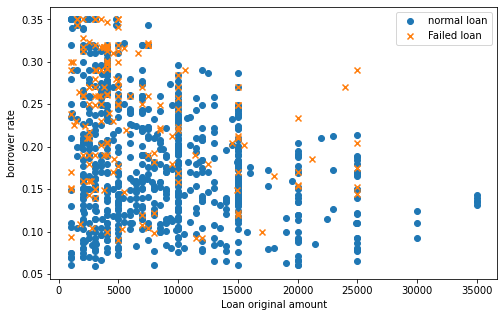

In [443]:
plt.figure(figsize=[8, 5])
for loan,marker in loan_type_markers:
    df_loan_type_markers = loan_dataset_samp[loan_dataset_samp['loan_type'] == loan]
    plt.scatter(data = df_loan_type_markers, x = 'LoanOriginalAmount', y = 'BorrowerRate', marker = marker)
plt.legend(['normal loan','Failed loan'])
plt.xlabel('Loan original amount')
plt.ylabel('borrower rate')



we notice in this graph loans are more likely to fail when the borrower rate increase and loan original amount increase,
after the 25k loan amount we notice that all loans are normal 

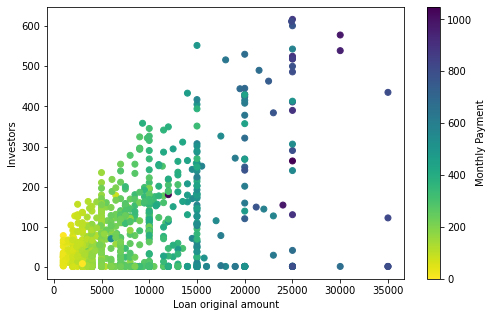

In [444]:
plt.figure(figsize=[8, 5])
plt.scatter(data = loan_dataset_samp, x = 'LoanOriginalAmount', y = 'Investors', c = 'MonthlyLoanPayment',cmap = 'viridis_r'
           
           );
plt.xlabel('Loan original amount')
plt.ylabel('Investors');
plt.colorbar(label = 'Monthly Payment');

higgher number of investors and a low original amount indicates that the monthly payment also gets higher

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> loan type varies according to the loan amount and borrower rate , as the bad loans are more likely to happen in higher borrower rates and lower loan amounts 

>loan amount has a postive cooleration with investors as the number of ivnestors increase the loan amount also increase

### Were there any interesting or surprising interactions between features?

> the monthly payment has a postive relation with investors and loan amount as the monthly payment increases when the number of investors and loan amount increase